# Trabalho 5

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

Importando e ajeitando a tabela das amostras

In [ ]:
df = pd.read_excel("../data/T5_A.xlsx") #Ler o arquivo excel de onde serão construídos os gráficos.
df = df.drop(['Amostra'], axis = 1) #Retira a coluna Amostra.

parametros = pd.read_excel("../data/tabelas.xlsx", header = None) #Importa o arquivo sem o cabeçalho.
parametros = parametros.drop([0,1], axis = 0) #Retira as duas primeiras linhas da tabela de valores.
parametros.columns = parametros.iloc[0].values #Substitui o cabeçalho da planilha pelos valores da primeira linha.
parametros = parametros.drop([2], axis = 0) #Retira a primeira linha.
parametros.index = range(len(parametros)) #Conserta os índices das linhas da tabela.

def parametro(p, n): #Definindo uma função para buscar o parâmetro desejado no dataframe parametros.
  p = str(p) #É o nome do parâmetro que desejamos encontrar.
  n = abs(int(n)) #É o tamanho de cada amostra.
  if n > len(parametros): #Suite para obter os valores da tabela.
    return parametros.loc[parametros.loc[len(parametros) - 1, "n"], p]
  elif n >= 2:
    return parametros.loc[n - 2, p]
  else:
    return 0

Saving TEP00120 - TABELAS.xlsx to TEP00120 - TABELAS.xlsx
Saving T5_A.xlsx to T5_A.xlsx
Saving T5_B.xlsx to T5_B.xlsx


Como $n$ > 11, é necessário criar os gráficos de $S$ e $\overline{X}$

Calculando os parâmetros para o gráfico de $S$

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['raleway'] not found. Falling back to DejaVu Sans.


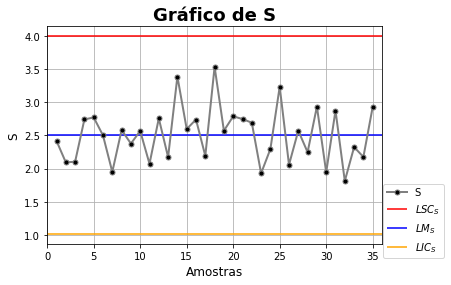

In [ ]:
df["S"] = df.std(axis = 1) #Cria a coluna S com os desvios padrões das amostras.
B3 = parametro("B3", len(df.drop(['S'], axis = 1).columns)) #Obtendo o parâmetro B3.
B4 = parametro("B4", len(df.drop(['S'], axis = 1).columns)) #Obtendo o parâmetro B4.
LM_S = df["S"].mean() #Calculando a Linha Média de S.
LIC_S = LM_S * B3 #Calculando a Linha Inferior de Controle de S.
LSC_S = LM_S * B4 #Calculando a Linha Superior de Controle de S.

plt.plot(range(1, len(Inercias) + 1),  df["S"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5) 
plt.hlines(LSC_S, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de R.
plt.hlines(LM_S, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de R.
plt.hlines(LIC_S, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de R.
plt.legend(['S', '$LSC_S$', '$LM_S$', '$LIC_S$'], loc = 'best', bbox_to_anchor=(1.2, 0.3)) #Adiciona a legenda.
plt.grid(True)
plt.title(
    "Gráfico de S",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
) #Adiciona o título com a formatação.
plt.xlabel(
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
) #Adiciona um título para o eixo horizontal.
plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel(
    "S",
    fontdict = {
        'family':'raleway',
        'color':'black',
        'weight': 12,
        'size': 12
    }
) #Adiciona o título para o eixo vertical.
plt.show() #E vemos que nenhuma amostra foge dos limites de S. 

Calculando os parâmetros para o gráfico de $\overline{X}$

In [ ]:
df["Xbarra"] = df.drop(['S'], axis = 1).mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
A3 = parametro("A3", len(df.drop(['S', 'Xbarra'], axis = 1).columns)) #Obtendo o parâmetro A3.
LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
LIC_Xbarra = LM_Xbarra - LM_S * A3 #Calculando a Linha Inferior de Controle de Xbarra.
LSC_Xbarra = LM_Xbarra + LM_S * A3 #Calculando a Linha Superior de Controle de Xbarra.

Desenhando o gráfico de $\overline{X}$

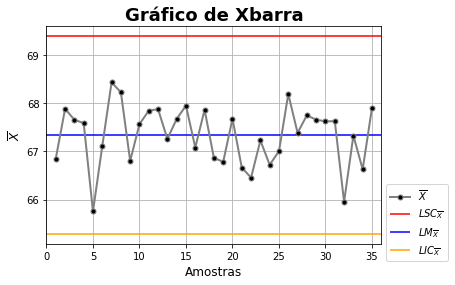

In [ ]:
plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de Xbarra.
plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de Xbarra.
plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de Xbarra.
plt.legend(
    [
        '$\overline{X}$',
        '$LSC_{\overline{X}}$',
        '$LM_{\overline{X}}$',
        '$LIC_{\overline{X}}$'
    ],
    loc = 'best',
    bbox_to_anchor=(1.0, 0.3)
)
plt.grid(True)
plt.title(
    "Gráfico de Xbarra",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel(
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel(
    "$\overline{X}$",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.savefig('Gráfico_Xbarra.png', format = 'png', dpi = 300, bbox_inches = 'tight')
plt.show() # E vê-se também que nenhuma amostra foge dos limites de Xbarra.

No entanto, para criar os gráficos sem precisar verificar "manualmente" quais amostras estão ou não dentro dos limites, e também sem precisar verificar quais gráficos tem que construir, se é $R$ ou $S$, vamos definir três funções para fazer isso automaticamente quando receber um DataFrame.

In [ ]:
def graficosRXbarra(df):

  #CALCULANDO OS PARÂMETROS NECESSÁRIOS PARA CRIAR O GRÁFICO DE R:

  df['R'] = df.max(axis = 1) - df.min(axis = 1) #Cria a coluna R com as amplitudes de cada amostra.
  D3 = parametro('D3', len(df.drop(['R'], axis = 1).columns)) #Obtendo o parâmetro D3.
  D4 = parametro('D4', len(df.drop(['R'], axis = 1).columns)) #Obtendo o parâmetro D4.
  LM_R = df["R"].mean() #Calculando a Linha Média de R.
  LIC_R = LM_R * D3 #Calculando a Linha Inferior de Controle de R.
  LSC_R = LM_R * D4 #Calculando a Linha Superior de Controle de R.

  """
  O próximo bloco de códigos verifica se o R de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  R serão recalculados.
  """

  i = 0 #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"R"] < LIC_R or df.loc[i,"R"] > LSC_R:
      df = df.drop([i], axis = 0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_R = df["R"].mean() #Recalculando a Linha Média de R.
      LIC_R = LM_R * D3 #Recalculando a Linha Inferior de Controle de R.
      LSC_R = LM_R * D4 #Recalculando a Linha Superior de Controle de R.
    i = i + 1

  #CALCULANDO OS PARÂMETROS NECESSÁRIOS PARA CRIAR O GRÁFICO DE XBARRA:

  df["Xbarra"] = df.drop(['R'], axis = 1).mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
  A2 = parametro("A2", len(df.drop(['R', 'Xbarra'], axis = 1).columns)) #Obtendo o parâmetro A2.
  LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
  LIC_Xbarra = LM_Xbarra - LM_R * A2 #Calculando a Linha Inferior de Controle de Xbarra.
  LSC_Xbarra = LM_Xbarra + LM_R * A2 #Calculando a Linha Superior de Controle de Xbarra.

  """
  O próximo bloco de códigos verifica se o Xbarra de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  Xbarra serão recalculados."""

  i = 0  #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"Xbarra"] < LIC_Xbarra or df.loc[i,"Xbarra"] > LSC_Xbarra: #Verifica se Xbarra de uma amostra foge dos limites.
      df = df.drop([i], axis = 0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_Xbarra = df["Xbarra"].mean() #Recalculando a Linha Média de Xbarra.
      LIC_Xbarra = LM_Xbarra - LM_R * A2 #Recalculando a Linha Inferior de Controle de Xbarra.
      LSC_Xbarra = LM_Xbarra + LM_R * A2 #Recalculando a Linha Superior de Controle de Xbarra.
    i = i + 1
  
  #CONSTRUINDO O GRÁFICO DE R:

  import matplotlib.pyplot as plt #Importando a biblioteca que será usada.
  plt.plot(range(1, len(df) + 1),  df["R"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5)
  plt.hlines(LSC_R, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de R.
  plt.hlines(LM_R, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de R.
  plt.hlines(LIC_R, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de R.
  plt.legend(['R', '$LSC_{R}$', '$LM_{R}$', '$LIC_{R}$'], loc = 'best', bbox_to_anchor=(1.2, 0.3))
  plt.grid(True)
  plt.title(
    "Gráfico de R",
    fontdict = {
      'family':'roboto',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "Amostras",
    fontdict = {
      'family':'raleway', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "R",
    fontdict = {
      'family':'raleway',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_R.png', format = 'png', dpi = 300, bbox_inches='tight')
  
  graficoR = Image.open('Gráfico_R.png') #Armazena o gráfico de R em uma variável.
  plt.close() #Apaga o gráfico de R

  #CONSTRUINDO O GRÁFICO DE XBARRA:

  plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
  plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de Xbarra.
  plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de Xbarra.
  plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de Xbarra.
  plt.legend(['$\overline{X}$',
              '$LSC_{\overline{X}}$',
              '$LM_{\overline{X}}$',
              '$LIC_{\overline{X}}$'], loc = 'best', bbox_to_anchor=(1.0, 0.3)) #Adiciona a legenda.
  plt.grid(True) #Adiciona grades de linhas.
  plt.title("Gráfico de Xbarra", fontdict = {'family':'roboto',
                                             'color':'black',
                                             'weight':'bold',
                                             'size': 18}) #Adiciona o título com a formatação.
  plt.xlabel("Amostras", fontdict = {'family':'raleway', 
                                     'color':'black',
                                     'weight': 12,
                                     'size': 12}) #Adiciona um título para o eixo horizontal.
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel("$\overline{X}$", fontdict = {'family':'raleway', 
                                           'color':'black',
                                           'weight': 12,
                                           'size': 12}) #Adiciona o título para o eixo vertical.
  plt.savefig('Gráfico_Xbarra.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.
  graficoXbarra = Image.open('Gráfico_Xbarra.png') #Armazena o gráfico de Xbarra em uma variável.
  plt.close() #Apaga toda o gráfico de R para construir o de Xbarra a seguir.

  return {'DataFrame': df,
          'Gráfico de R': graficoR,
          'LSC_R': LSC_R,
          'LM_R': LM_R,
          'LIC_R': LIC_R,
          'Gráfico de Xbarra': graficoXbarra,
          'LSC_Xbarra': LSC_Xbarra,
          'LM_Xbarra': LM_Xbarra,
          'LIC_Xbarra': LIC_Xbarra} #Retorna um dicionário com os gráficos e suas informações.

def graficosSXbarra(df): #Função que constrói os parâmetros de R e Xbarra.

  #CALCULANDO OS PARÂMETROS PARA CRIAR O GRÁFICO DE S:

  df["S"] = df.std(axis = 1) #Cria a coluna S com os desvios padrões das amostras.
  B3 = parametro("B3", len(df.drop(['S'], axis = 1).columns)) #Obtendo o parâmetro B3.
  B4 = parametro("B4", len(df.drop(['S'], axis = 1).columns)) #Obtendo o parâmetro B4.
  LM_S = df["S"].mean() #Calculando a Linha Média de S.
  LIC_S = LM_S * B3 #Calculando a Linha Inferior de Controle de S.
  LSC_S = LM_S * B4 #Calculando a Linha Superior de Controle de S.

  """
  O próximo bloco de códigos verifica se o R de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  R serão recalculados."""

  i = 0 #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"S"] < LIC_S or df.loc[i,"S"] > LSC_S: #Verifica se o S de uma amostra foge dos limites.
      df = df.drop([i], axis=0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_S = df["S"].mean() #Recalculando a Linha Média de S.
      LIC_S = LM_S * B3 #Recalculando a Linha Inferior de Controle de S.
      LSC_S = LM_S * B4 #Recalculando a Linha Superior de Controle de S.
    i = i + 1

  #CALCULANDO OS PARÂMETROS NECESSÁRIOS PARA CRIAR O GRÁFICO DE XBARRA:

  df["Xbarra"] = df.drop(['S'], axis = 1).mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
  A3 = parametro("A3", len(df.drop(['S', 'Xbarra'], axis = 1).columns)) #Obtendo o parâmetro A3.
  LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
  LIC_Xbarra = LM_Xbarra - LM_S * A3 #Calculando a Linha Inferior de Controle de Xbarra.
  LSC_Xbarra = LM_Xbarra + LM_S * A3 #Calculando a Linha Superior de Controle de Xbarra.

  """
  O próximo bloco de códigos verifica se o Xbarra de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  Xbarra serão recalculados."""

  i = 0  #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"Xbarra"] < LIC_Xbarra or df.loc[i,"Xbarra"] > LSC_Xbarra: #Verifica se Xbarra de uma amostra foge dos limites.
      df = df.drop([i], axis = 0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_Xbarra = df["Xbarra"].mean() #Recalculando a Linha Média de Xbarra.
      LIC_Xbarra = LM_Xbarra - LM_S * A3 #Recalculando a Linha Inferior de Controle de Xbarra.
      LSC_Xbarra = LM_Xbarra + LM_S * A3 #Recalculando a Linha Superior de Controle de Xbarra.
    i = i + 1

  #CONSTRUINDO O GRÁFICO DE S:

  plt.plot(range(1, len(df) + 1),  df["S"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5) 
  plt.hlines(LSC_S, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de R.
  plt.hlines(LM_S, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de R.
  plt.hlines(LIC_S, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de R.
  plt.legend(['S', '$LSC_S$', '$LM_S$', '$LIC_S$'], loc = 'best', bbox_to_anchor=(1.2, 0.3)) #Adiciona a legenda.
  plt.grid(True) #Adiciona grades de linhas.
  plt.title("Gráfico de S", fontdict = {'family':'roboto',
                                        'color':'black',
                                        'weight':'bold',
                                        'size': 18}) #Adiciona o título com a formatação.
  plt.xlabel("Amostras", fontdict = {'family':'raleway', 
                                    'color':'black',
                                    'weight': 12,
                                    'size': 12}) #Adiciona um título para o eixo horizontal.
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel("S", fontdict = {'family':'raleway',
                              'color':'black',
                              'weight': 12,
                              'size': 12}) #Adiciona o título para o eixo vertical.
  plt.savefig('Gráfico_S.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.
  plt.close() #Fecha a área de plotagem do gráfico.

  graficoS = Image.open('Gráfico_S.png')

  #CONSTRUINDO O GRÁFICO DE XBARRA:

  plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
  plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de Xbarra.
  plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de Xbarra.
  plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de Xbarra.
  plt.legend(['$\overline{X}$',
              '$LSC_{\overline{X}}$',
              '$LM_{\overline{X}}$',
              '$LIC_{\overline{X}}$'], loc = 'best', bbox_to_anchor=(1.0, 0.3)) #Adiciona a legenda.
  plt.grid(True)
  plt.title(
    "Gráfico de Xbarra",
    fontdict = {
      'family':'roboto',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "Amostras",
    fontdict = {
      'family':'raleway', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "$\overline{X}$",
    fontdict = {
      'family':'raleway', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_Xbarra.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.
  plt.close() #Fecha a área de plotagem do gráfico.
  graficoXbarra = Image.open('Gráfico_Xbarra.png') #Armazena o gráfico de Xbarra em uma variável.

  return {
    'DataFrame': df,
    'Gráfico de S': graficoS,
    'LSC_S': LSC_S,
    'LM_S': LM_S,
    'LIC_S': LIC_S,
    'Gráfico de Xbarra': graficoXbarra,
    'LSC_Xbarra': LSC_Xbarra,
    'LM_Xbarra': LM_Xbarra,
    'LIC_Xbarra': LIC_Xbarra
  }

def graficosCEP(df): #Função que constrói os gráficos para o Controle Estatístico de Processos.
  n = len(df.columns) #Obtém o tamanho que cada amostra tem.
  if n < 11: #Se o tamanho das amostras forem menores do que 11, então ...
    return graficosRXbarra(df) #Constroi os gráficos de R e Xbarra.
  else:
    return graficosSXbarra(df) #Senão, constrói os de S e Xbarra.

df1 = pd.read_excel("T5_A.xlsx") #Definindo um outro dataframe que receberá nossos dados de T5_A.xlsx.
CEP = graficosCEP(df1.drop(['Amostra'], axis = 1)) # As informações do CEP são armazenados em uma variável.

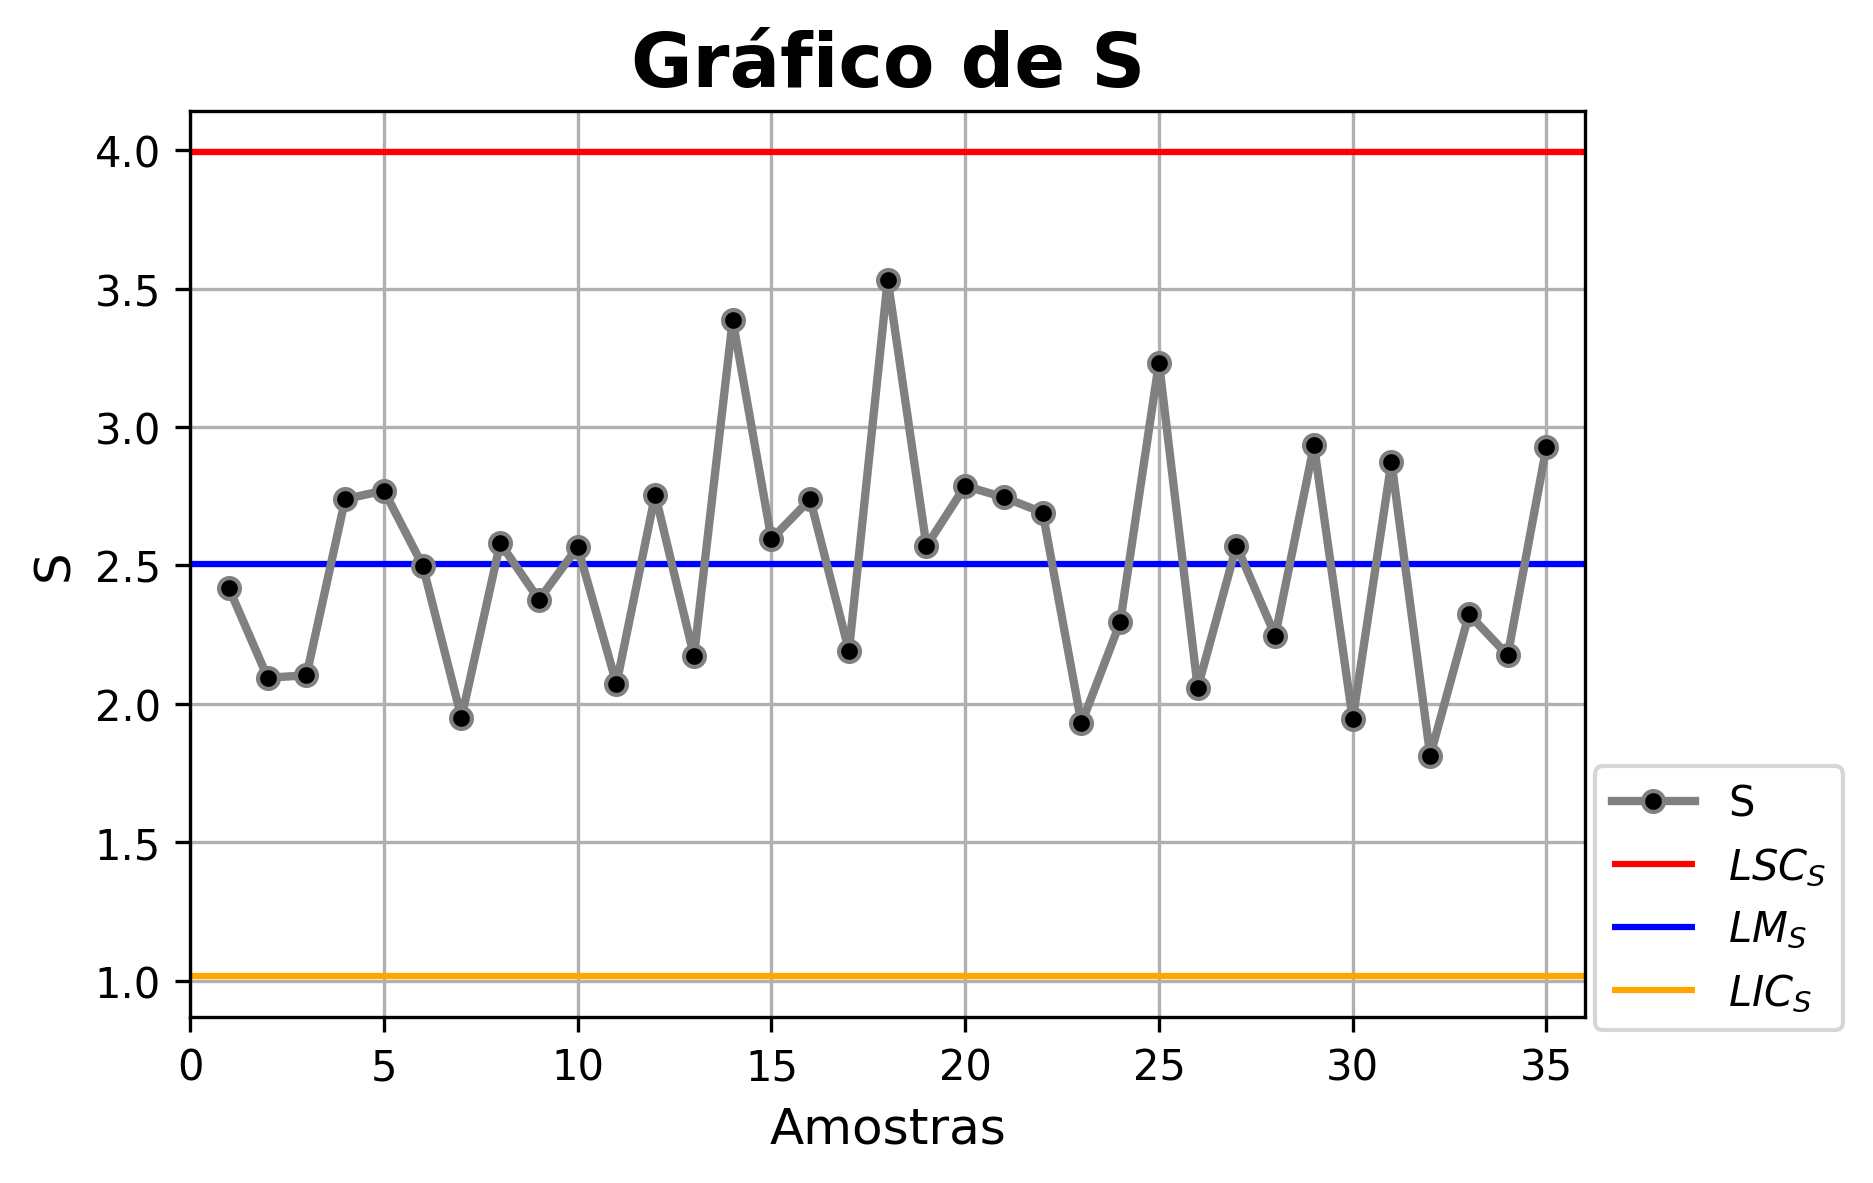

In [ ]:
CEP['Gráfico de S'] #Como se sabe que n >= 11, então sabe-se que o Gráfico que temos é o de S, e não de R.

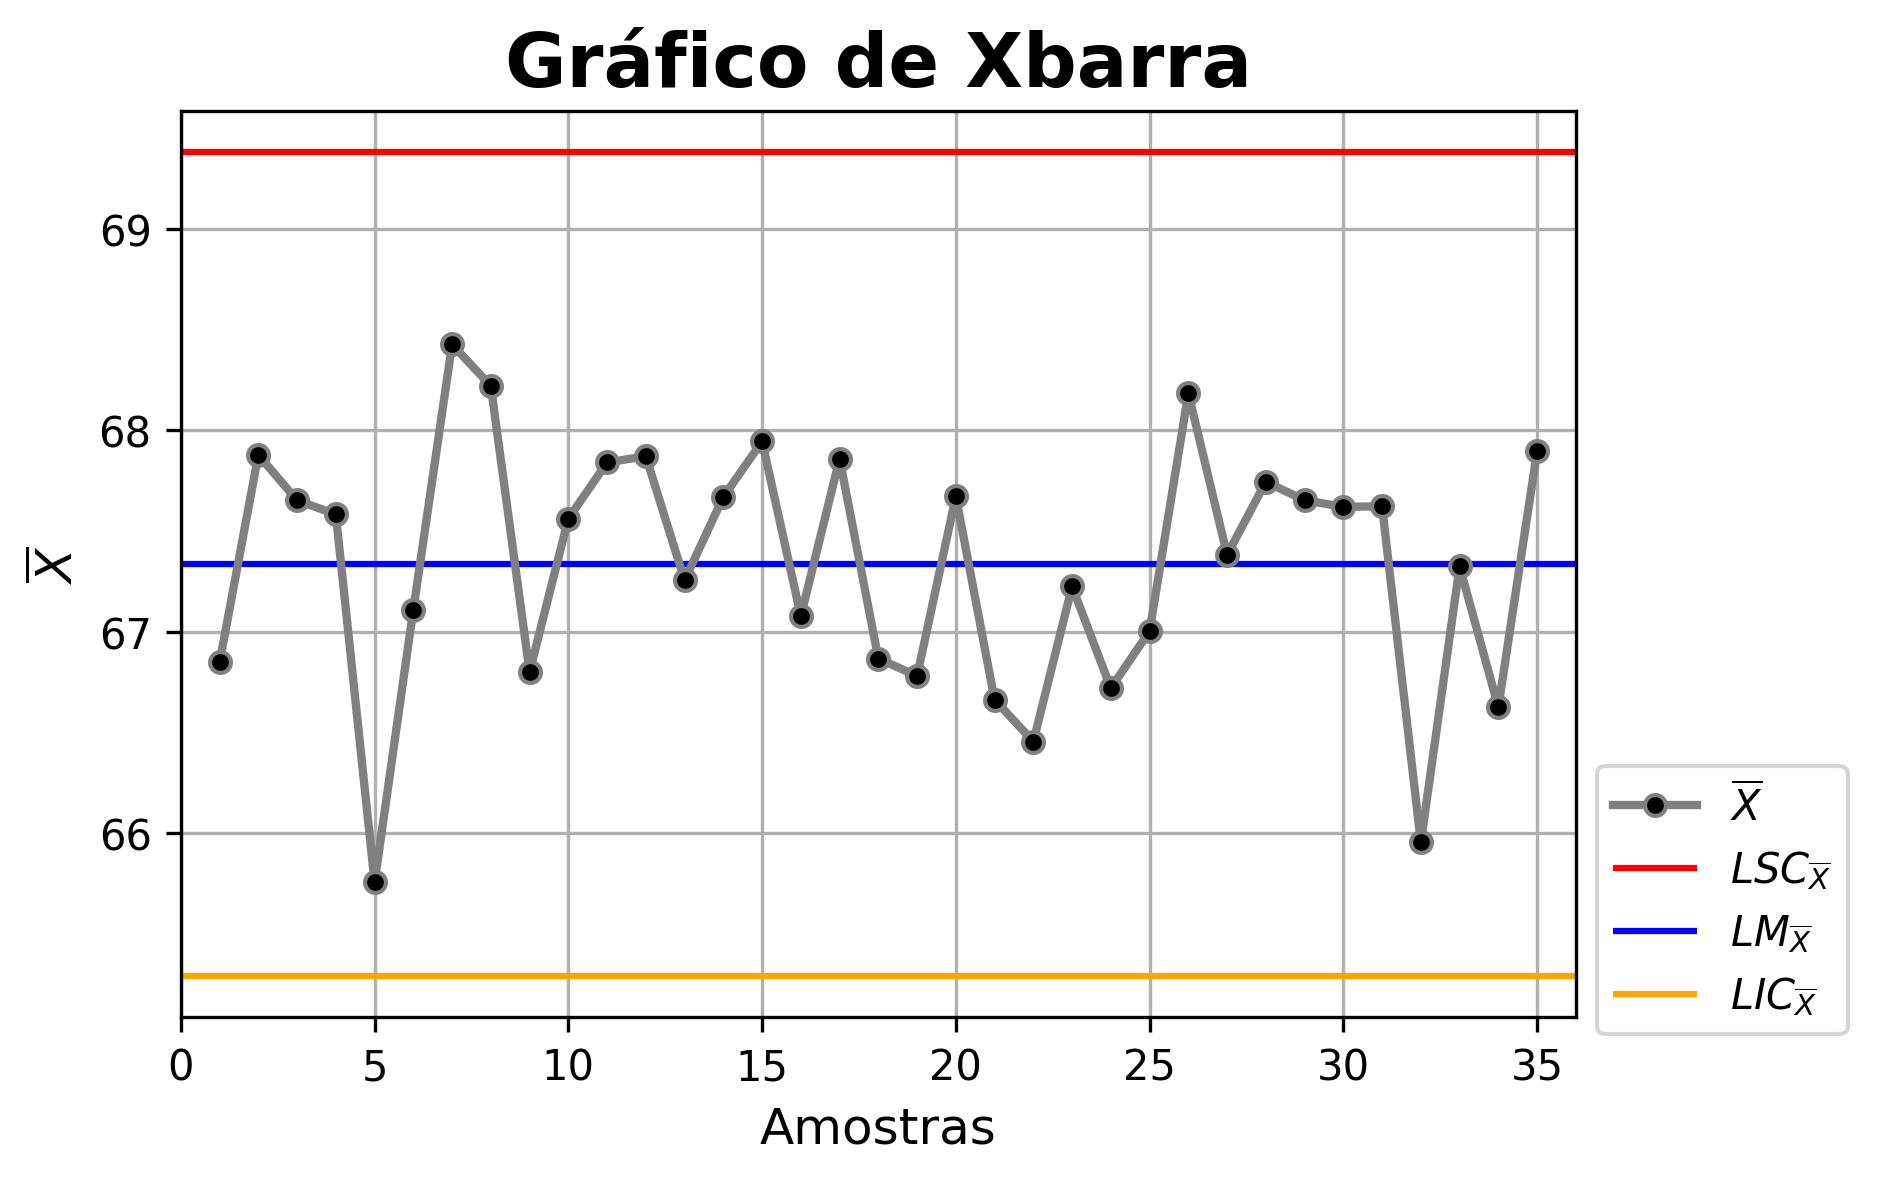

In [ ]:
CEP['Gráfico de Xbarra']

Construindo o gráfico de $S$ do segundo DataFrame

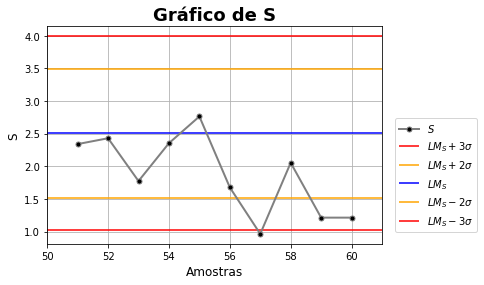

In [ ]:
df2 = pd.read_excel("T5_B.xlsx") #Ler o arquivo excel de onde serão construídos os gráficos.
df2['S'] = df2.drop(['Amostra'], axis = 1).std(axis = 1)
df2['Xbarra'] = df2.drop(['Amostra', 'S'], axis = 1).mean(axis = 1)

#CONSTRUINDO O GRÁFICO DE S DO SEGUNDO DATAFRAME:

plt.plot(df2['Amostra'],  df2["S"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5) 
plt.hlines( # Adiciona a Linha Superior de Controle de R.
    CEP['LSC_S'],
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "red"
)
plt.hlines( # Adiciona uma linha 2*sigma unidades acima de LM_S.
    CEP['LM_S'] + (2/3)*(CEP['LSC_S'] - CEP['LM_S']),
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "orange"
) 
plt.hlines( # Adiciona a linha Linha Média de R.
    CEP['LM_S'],
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "blue"
)
plt.hlines( # Adiciona uma linha 2*sigma unidades abaixo de LM_S.
    CEP['LM_S'] + (2/3)*(CEP['LIC_S'] - CEP['LM_S']),
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "orange"
)
plt.hlines( # Adiciona a Linha Inferior de Controle de R.
    CEP['LIC_S'],
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "red"
)
plt.legend(
    [
        '$S$',
        '$LM_{S} + 3\sigma$',
        '$LM_{S} + 2\sigma$',
        '$LM_{S}$',
        '$LM_{S} - 2\sigma$',
        '$LM_{S} - 3\sigma$'
    ],
    loc = 'best',
    bbox_to_anchor=(1.3, 0.6)
)
plt.grid(True) #Adiciona grades de linhas.
plt.title(
    "Gráfico de S",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel( # Adiciona um título para o eixo horizontal.
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = df2.loc[0, 'Amostra'] - 1, right = df2.loc[len(df2) - 1, 'Amostra'] + 1) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel( # Adiciona o título para o eixo vertical.
    "S",
    fontdict = {
        'family':'raleway',
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.savefig('Gráfico_S2.png', format = 'png', dpi = 300, bbox_inches = 'tight')
plt.show()

Construindo o gráfico de $\overline{X}$ do segundo DataFrame

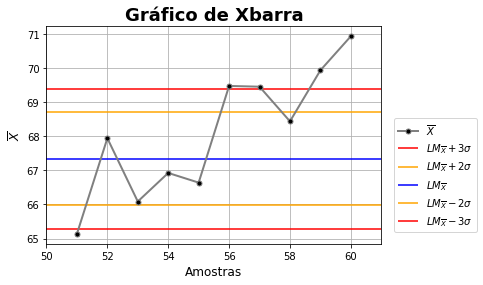

In [ ]:
plt.plot(df2['Amostra'],  df2["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
plt.hlines( # Adiciona a Linha Superior de Controle de Xbarra.
    CEP['LSC_Xbarra'],
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "red"
)
plt.hlines( # Adiciona a com 2*sigma de afastamento de LMXbarra.
    CEP['LM_Xbarra'] + (2/3) * (CEP['LSC_Xbarra'] - CEP['LM_Xbarra']),
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "orange"
)
plt.hlines( # Adiciona a linha Linha Média de Xbarra.
    CEP['LM_Xbarra'],
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "blue"
)
plt.hlines( # Adiciona a com 2*sigma de afastamento de LMXbarra.
    CEP['LM_Xbarra'] + (2/3) * (CEP['LIC_Xbarra'] - CEP['LM_Xbarra']),
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "orange"
)
plt.hlines( # Adiciona a Linha Inferior de Controle de Xbarra.
    CEP['LIC_Xbarra'],
    xmin = df2.loc[0, 'Amostra'] - 1,
    xmax = df2.loc[len(df2) - 1, 'Amostra'] + 1,
    colors = "red"
)
plt.legend(
    [
        '$\overline{X}$',
        '$LM_{\overline{X}} + 3\sigma$',
        '$LM_{\overline{X}} + 2\sigma$',
        '$LM_{\overline{X}}$',
        '$LM_{\overline{X}} - 2\sigma$',
        '$LM_{\overline{X}} - 3\sigma$'
    ],
    loc = 'best',
    bbox_to_anchor=(1.3, 0.6)
)
plt.grid(True)
plt.title(
    "Gráfico de Xbarra",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel(
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = df2.loc[0, 'Amostra'] - 1, right = df2.loc[len(df2) - 1, 'Amostra'] + 1) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel(
    "$\overline{X}$",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.savefig('Gráfico_Xbarra2.png', format = 'png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
def RSD(df, CEP): #Função que identifica o tipo de Regra Suplementar de Decisão ocorrida.
  df['Xbarra'] = df.drop(['Amostra'], axis = 1).mean(axis = 1)
  C = {'C1': set(), 'C2': set(), 'C3': set()} #Dicionário que armazenará as ocorrências de C1, C2 e C3.
  i = 0 #Definindo um contador que será utilizado nas estruturas de iteração.

  # Verificando a ocorrência de C1:
  i = 0 #Definindo um contador que será utilizado nas estruturas de iteração.
  while i < len(df):
    """
    Se o Xbarra  de uma amostra for menor que LIC_Xbarra ou
    maior que LSC_Xbarra, então ocorreu C1 para esta amostra."""
    if df.iloc[i, len(df.columns) - 1] < CEP['LIC_Xbarra'] or \
       df.iloc[i, len(df.columns) - 1] > CEP['LSC_Xbarra']:
      C['C1'].add(df.iloc[i, 0])
    i = i + 1

  # Verificando a ocorrência de C2:
  mumenos2sigma = CEP['LM_Xbarra'] + (2/3) * (CEP['LIC_Xbarra'] - CEP['LM_Xbarra']) #Valor 2*sigma unidades abaixo de LM_Xbarra.
  mumais2sigma = CEP['LM_Xbarra'] + (2/3) * (CEP['LSC_Xbarra'] - CEP['LM_Xbarra']) #Valor 2*sigma unidades acima de LM_Xbarra.
  i = 0
  while i < len(df) - 1:
    """
    Para cada par subsequente de amostras, se ambas tiverem Xbarra < mu - 2*sigma ou
    Xbarra > mu + 2*sigma, então ocorreu C2 para esse par."""
    Xbarras = [df.iloc[i, len(df.columns) - 1], df.iloc[i + 1, len(df.columns) - 1]]
    if (Xbarras[0] < mumenos2sigma and Xbarras[1] < mumenos2sigma) or \
       (Xbarras[0] > mumais2sigma and Xbarras[1] > mumais2sigma):
      C['C2'].add((df.iloc[i, 0], df.iloc[i + 1, 0]))
    i = i + 1
  
  # Verificando a ocorrência de C3:
  i = 0
  while i < len(df) - 2:
    """
    Para cada três amostras subsequentes, se a primeira e a terceira tiverem ambos
    Xbarra < mu - 2*sigma ou Xbarra > mu + 2*sigma, então ocorreu C3 para essas amostras.
    Também ocorre C3 se todas as 3 amostras tiverem Xbarra < mu - 2*sigma ou se
    Xbarra > mu + 2*sigma."""
    Xbarras = (df.iloc[i, len(df.columns) - 1], df.iloc[i + 1, len(df.columns) - 1], df.iloc[i + 2, len(df.columns) - 1])
    if (Xbarras[0] < mumenos2sigma and Xbarras[1] < mumenos2sigma) or \
       (Xbarras[0] > mumais2sigma  and Xbarras[1] > mumais2sigma)  or \
       (Xbarras[0] < mumenos2sigma and Xbarras[2] < mumenos2sigma) or \
       (Xbarras[0] > mumais2sigma  and Xbarras[2] > mumais2sigma)  or \
       (Xbarras[1] < mumenos2sigma and Xbarras[2] < mumenos2sigma) or \
       (Xbarras[1] > mumais2sigma  and Xbarras[2] > mumais2sigma):
      C['C3'].add((df.iloc[i, 0], df.iloc[i + 1, 0], df.iloc[i + 2, 0]))
    i = i + 1

  return C #Retorna o dicionário com as amostras onde ocorrem C1, C2 e C3.

RSD(df2.drop(['S', 'Xbarra'], axis = 1), CEP)

{'C1': {51, 56, 57, 59, 60},
 'C2': {(56, 57), (59, 60)},
 'C3': {(55, 56, 57), (56, 57, 58), (57, 58, 59), (58, 59, 60)}}